# Comparison of TensorFlow and Random Forest Model with Python

Author: Dinesh Madhup | E-Mail: dineshmadhup@gmail.com

Datasets: pulsar_stars.csv and  Data Source: Kaggle

## Introduction

A pulsar star which emits a beam of electromagnetic radiation and can be seen only when its pointing towards the earth.
In this paper, I have developed a predictive model using TensorFlow and Random Forest and have compared the two model
results. The result reveals that the model developed using TensorFlow and Random Forest have very high accuracy. 

The data set and attribute information for this development was retrieved from the following source and link:
https://archive.ics.uci.edu/ml/datasets/HTRU2 And https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star

Dr Robert Lyon, University of Manchester, School of Physics and Astronomy, Alan Turing Building, Manchester M13 9PL, United Kingdom, robert.lyon '@' manchester.ac.uk

### Data Set Information:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### Attribute Information:

During this development, stable version of TensorFlow (version 1.14) has been used and for Random Forest model I have 
used scikit learn library.

#### Import libraries for the development process

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
# Evaluations
from sklearn.metrics import classification_report,confusion_matrix

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# TensorFlow
import tensorflow as tf

#### Read CSV data using pandas

In [3]:
pulsar_Data = pd.read_csv('pulsar_stars.csv')

In [4]:
pulsar_Data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
pulsar_Data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

#### To use TensorFlow framework, it is important not to have any white space and special character in the column name of the datasets. You can see below, the column name has altered to meet the TensorFlow requirements.

In [6]:
pulsar_Data.columns = ['Mean_of_the_integrated_profile',
                       'Standard_deviation_of_the_integrated_profile',
                       'Excess_kurtosis_of_the_integrated_profile',
                       'Skewness_of_the_integrated_profile',
                        'Mean_of_the_DM_SNR_curve',
                        'Standard_eviation_of_the_DM_SNR_curve',
                        'Excess_kurtosis_of_the_DM_SNR_curve',
                       'Skewness_of_the_DM_SNR_curve',
                       'target_class']

In [7]:
pulsar_Data.isnull().any()

Mean_of_the_integrated_profile                  False
Standard_deviation_of_the_integrated_profile    False
Excess_kurtosis_of_the_integrated_profile       False
Skewness_of_the_integrated_profile              False
Mean_of_the_DM_SNR_curve                        False
Standard_eviation_of_the_DM_SNR_curve           False
Excess_kurtosis_of_the_DM_SNR_curve             False
Skewness_of_the_DM_SNR_curve                    False
target_class                                    False
dtype: bool

### Data Visualization

#### Correlation

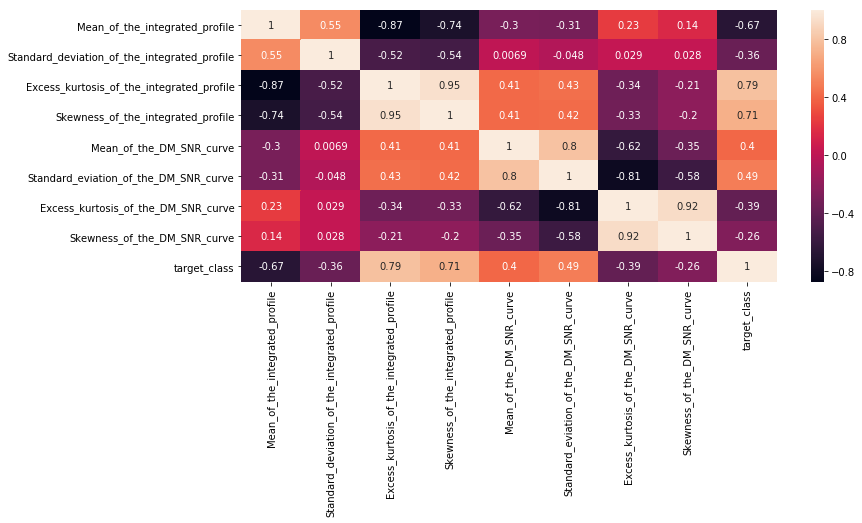

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(pulsar_Data.corr(),annot=True)

#### Count Plot of target

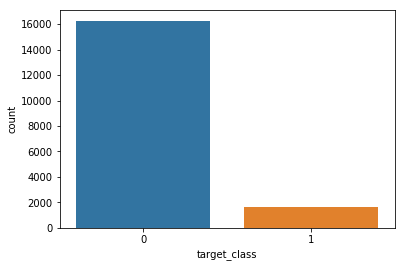

In [8]:
# Count plot for target which displays total zeros and ones
sns.countplot(x='target_class', data=pulsar_Data)

#### Pair Plot

C:\Users\Dinesh Madhup\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dinesh Madhup\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


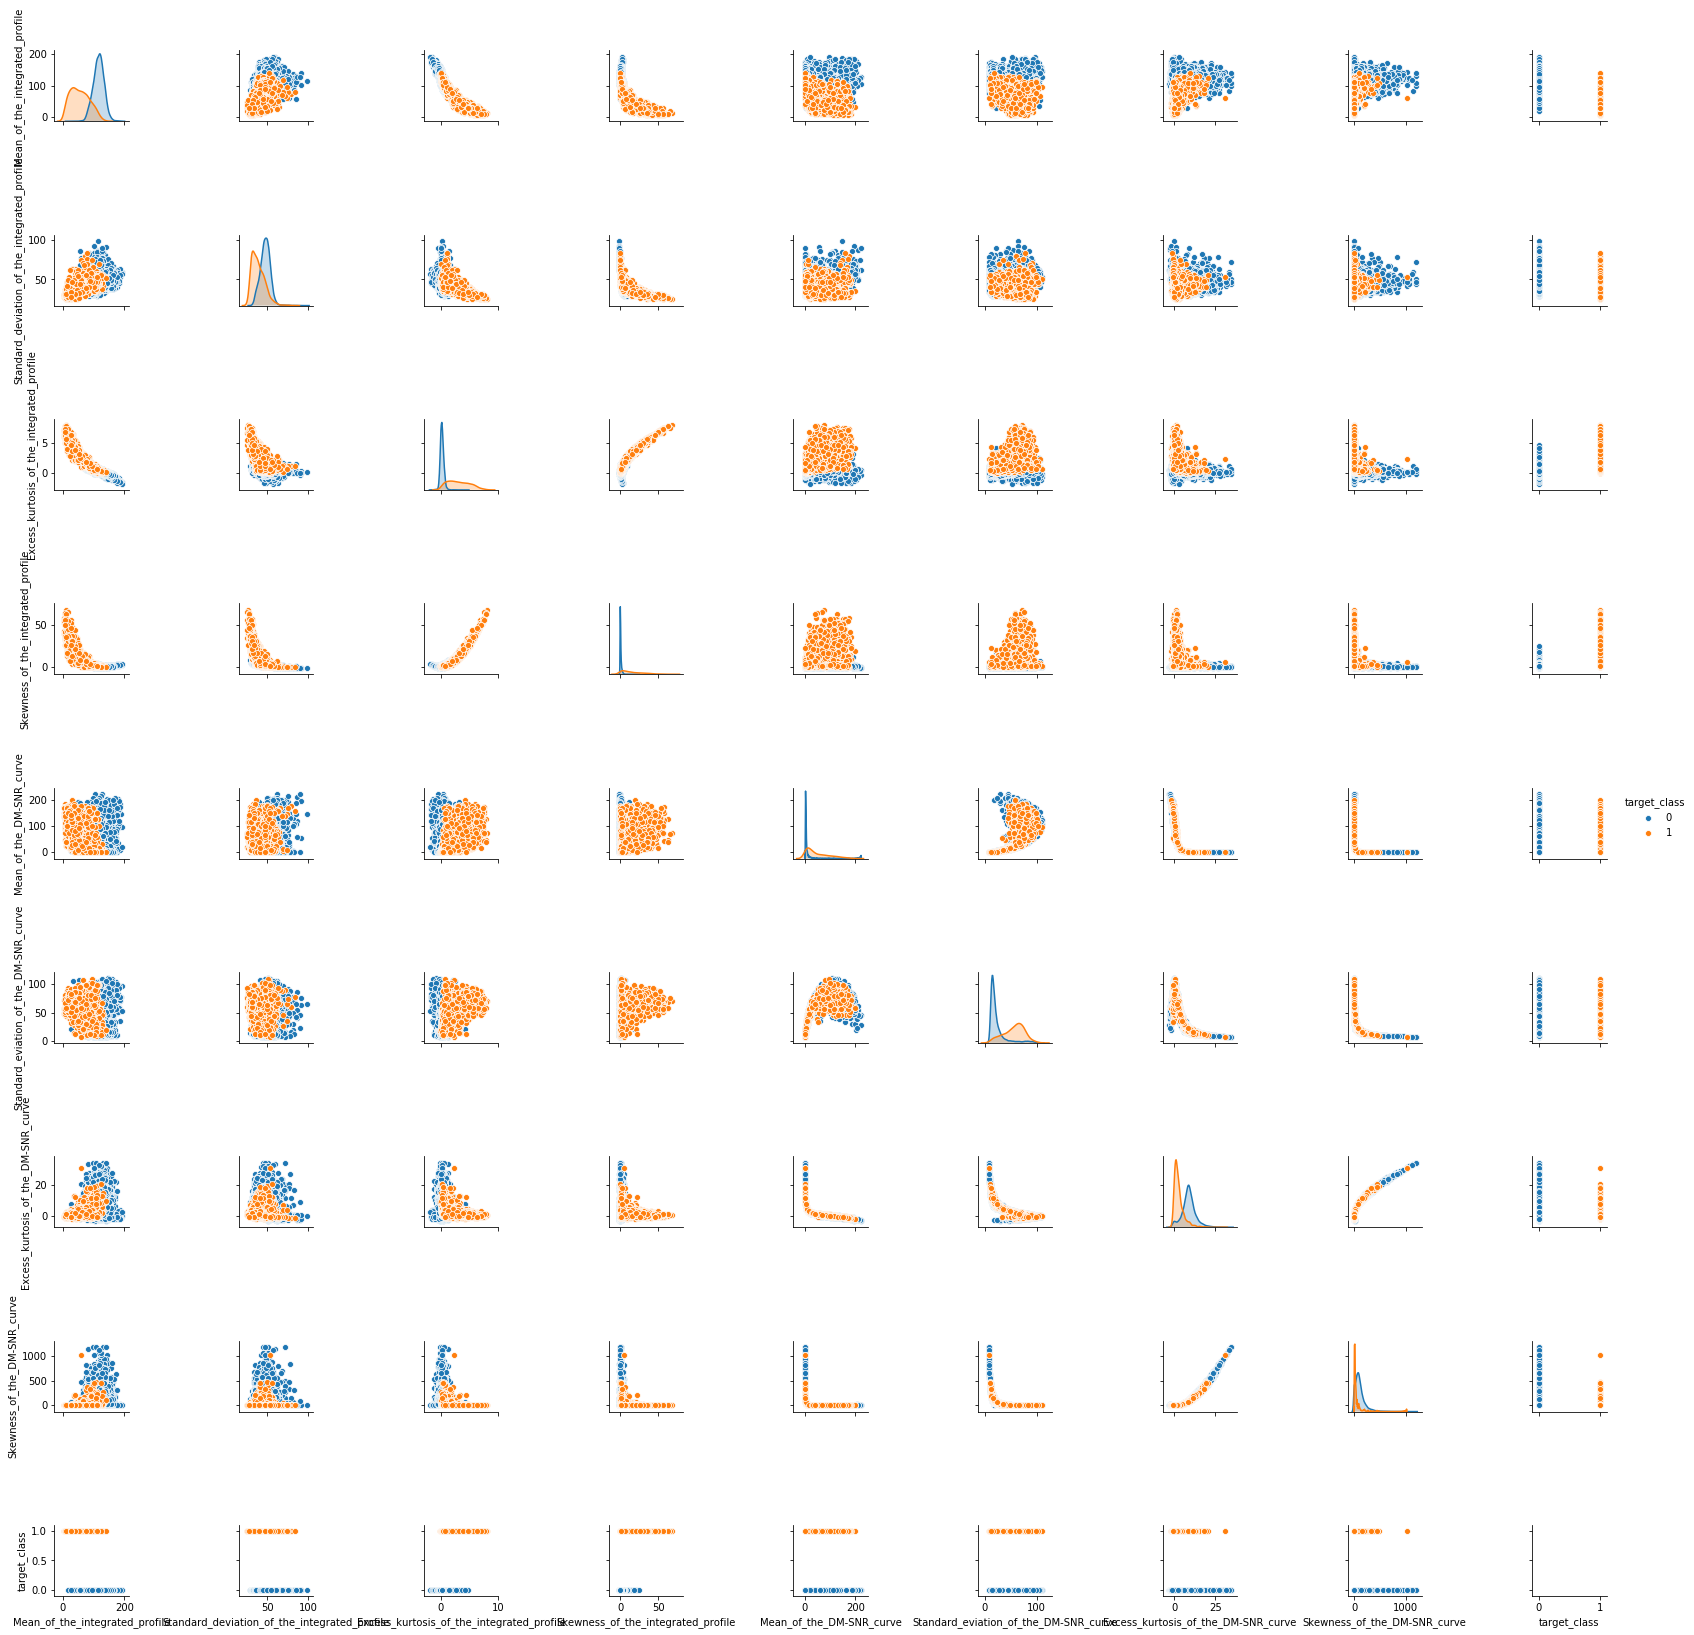

In [128]:
sns.pairplot(data=pulsar_Data, hue='target_class')

Above pair plot visualizations show that the data are well distinguished and classification model can be developed using
target class. Moreover, the correlation plot shows that all features in the data are well correlated. So, Let's build the model
with all features in the data.

To make the origional data as intact, deep copy method has been used to create a new data object

In [9]:
df = pulsar_Data.copy()

In [10]:
df.head(5)

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_eviation_of_the_DM_SNR_curve',
       'Excess_kurtosis_of_the_DM_SNR_curve', 'Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

In [12]:
#def train_test_split():
def data_prep(df):
    feature_columns = df.columns[:-1]
    df_features = pd.DataFrame(data=df, columns=feature_columns)
    return df_features

In [13]:
df_features = data_prep(df)

In [14]:
df_features.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [35]:
X = df_features.copy()
y = df['target_class'].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Standard Scaler

In [46]:
def standardScaling(feature):
    scaler = StandardScaler().fit(feature)
    scaled_feature = scaler.transform(feature)
    scaled_feat = pd.DataFrame(data = scaled_feature, columns = df_features.columns)
    return scaled_feat

In [47]:
X_train_scaled = standardScaling(X_train)
X_test_scaled = standardScaling(X_test)

In [48]:
X_train_scaled.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve
0,1.174685,0.125178,-0.550922,-0.316309,-0.366324,-0.404264,0.583192,0.173995
1,-0.449942,0.734139,-0.001555,-0.268396,-0.337912,-0.518624,0.104527,-0.092731
2,0.326117,3.622872,-0.393174,-0.505956,-0.400480,-0.880086,2.562073,3.643563
3,1.324557,0.420919,-0.596320,-0.298289,-0.223059,0.317884,-0.639368,-0.713762
4,0.349174,-0.089846,-0.616978,-0.257177,-0.359151,-0.547363,0.405448,0.139773


During scaling process the index of X_train and X_test are changed. So, you must also reset the index of y_train and y_test
as below, otherwise you will get index mismatch error.

In [50]:
y_train = y_train.reset_index(drop=True)

In [51]:
y_test = y_test.reset_index(drop=True)

## TensorFlow

### Programming With Estimators

An Estimator is TensorFlow's high-level representation of a complete model. It handles the details of initialization, 
logging, saving and restoring, and many other features so you can concentrate on your model. An Estimator is any class 
derived from tf.estimator.Estimator. 

An Estimator is any class derived from tf.estimator.Estimator. TensorFlow provides a pre-made Estimators to implement 
common ML algorithms.

Let's apply the algorithm on pulsar star data set.

### 1. Create input functions

You must create input functions to supply data for 1. training, 2. evaluating, and 3. prediction.

In [81]:
# Create a input function to train the model
input_func_train = tf.estimator.inputs.pandas_input_fn(x=X_train_scaled,y=y_train, batch_size=50,shuffle=True)

In [82]:
# Create a input function to evaluate the model after train
input_func_test = tf.estimator.inputs.pandas_input_fn(x=X_test_scaled,y=y_test, batch_size=50,shuffle=False)

In [83]:
# Create a input function for prediction
input_func_prediction = tf.estimator.inputs.pandas_input_fn(x=X_test_scaled,y=y_test, batch_size=50,shuffle=False)

### 2. Feature Columns

A feature column is an object describing how the model should use raw input data from the features dictionary. When you build an Estimator model, you pass it a list of feature columns that describes each of the features you want the model to use. The tf.feature_column module provides many options for representing data to the model.

In [84]:
# Get all feature columns
df_features.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_eviation_of_the_DM_SNR_curve',
       'Excess_kurtosis_of_the_DM_SNR_curve', 'Skewness_of_the_DM_SNR_curve'],
      dtype='object')

In [85]:
# Defining the model's feature columns
my_feature_columns = []
for col in df_features.columns:
    my_feature_columns.append(tf.feature_column.numeric_column(col))

In [86]:
# Print feature columns
my_feature_columns

[NumericColumn(key='Mean_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Standard_deviation_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Excess_kurtosis_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Skewness_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Mean_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Standard_eviation_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Excess_kurtosis_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Skewness_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float

### 2. Instantiate an estimator

Instantiate an Estimator using Deep Neural Network Classifier(DNNClassifier) tf.estimator. DNNClassifier is a pre-made Estimator class that trains classification models based 
on dense, feed-forward neural networks. tf.estimator.DNNClassifier for deep models that perform multi-class classification.

In [89]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10,10],
    # The model must choose between 2 classes.
    n_classes=2
)

W0709 14:38:01.771494 10964 estimator.py:1811] Using temporary folder as model directory: C:\Users\DINESH~1\AppData\Local\Temp\tmp_99lr_b5


### 4. Train the model

In [90]:
# Train the model by calling the Estimator's train method
classifier.train(input_fn=input_func_train, steps=50)

### Evaluate the trained model

In [91]:
# Evaluate the model.
eval_result = classifier.evaluate(input_func_test, steps=len(X_test))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

W0709 14:39:30.638391 10964 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0709 14:39:30.662240 10964 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.



Test set accuracy: 0.977



### Making prediction from the trained model

In [126]:
#prediction_fn=tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

In [92]:
predictions = list(classifier.predict(input_fn=input_func_prediction))

In [93]:
predictions[0]

{'logits': array([-5.2259927], dtype=float32),
 'logistic': array([0.00534624], dtype=float32),
 'probabilities': array([0.9946537 , 0.00534629], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [94]:
final_predictions = []
for pred in predictions:
    final_predictions.append(pred['class_ids'][0])

### Classification Report and Confusion Matrix

In [95]:
# Evaluations
print('Classification Reprt: \n')
print(classification_report(y_test,final_predictions))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,final_predictions))

Classification Reprt: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4896
           1       0.93      0.80      0.86       474

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.90      0.92      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4869   27]
 [  95  379]]


### Random Forest

In [96]:
rf_model = RandomForestClassifier(n_estimators=200)

In [97]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluations With Random Forest

In [98]:
rf_prediction = rf_model.predict(X_test_scaled)

In [99]:
# Evaluations
print('Classification Reprt: \n')
print(classification_report(y_test,rf_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,rf_prediction))

Classification Reprt: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4896
           1       0.94      0.82      0.88       474

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4870   26]
 [  83  391]]


### Conclusion

The comparision of TensorFlow and Random Forest model result revels that the results accuracy are very high and can be
deployed for future value pridction.

### References: